# Health expenditure

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

# Options and Settings

In [2]:
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.autolayout'] = True
plt.rcParams['figure.figsize'] = [12, 9]
plt.rcParams['font.size'] = 12
path = os.getcwd()                                         # get current working directory
warnings.simplefilter('ignore')

# Import Data

In [3]:
filepath = os.path.join('datasets', 'Expenditure on health.csv')
df = pd.read_csv(filepath)

# Head and Tail

In [4]:
df

,Region/Country/Area,Unnamed: 1,Year,Series,Value,Footnotes,Source,Unnamed: 7,Unnamed: 8
0,4,Afghanistan,2005,Current health expenditure (% of GDP),9.9,NaN,"World Health Organization (WHO), Geneva, WHO G...",NaN,NaN
1,4,Afghanistan,2010,Current health expenditure (% of GDP),8.6,NaN,"World Health Organization (WHO), Geneva, WHO G...",NaN,NaN
2,4,Afghanistan,2016,Current health expenditure (% of GDP),11.0,NaN,"World Health Organization (WHO), Geneva, WHO G...",NaN,NaN
3,4,Afghanistan,2017,Current health expenditure (% of GDP),11.8,NaN,"World Health Organization (WHO), Geneva, WHO G...",NaN,NaN
4,4,Afghanistan,2018,Current health expenditure (% of GDP),9.4,NaN,"World Health Organization (WHO), Geneva, WHO G...",NaN,NaN
...,...,...,...,...,...,...,...,...,...
2253,716,Zimbabwe,2018,Current health expenditure (% of GDP),4.7,NaN,"World Health Organization (WHO), Geneva, WHO G...",NaN,NaN
2254,716,Zimbabwe,2010,Domestic general government health expenditure...,15.2,NaN,"World Health Organization (WHO), Geneva, WHO G...",NaN,NaN
2255,716,Zimbabwe,2016,Domestic general government health expenditure...,7.6,NaN,"World Health Organization (WHO), Geneva, WHO G...",NaN,NaN
2256,716,Zimbabwe,2017,Domestic general government health expenditure...,7.6,NaN,"World Health Organization (WHO), Geneva, WHO G...",NaN,NaN


In [5]:
df.shape

(2258, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2258 entries, 0 to 2257
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Region/Country/Area  2258 non-null   int64  
 1   Unnamed: 1           2258 non-null   object 
 2   Year                 2258 non-null   int64  
 3   Series               2258 non-null   object 
 4   Value                2258 non-null   float64
 5   Footnotes            822 non-null    object 
 6   Source               2258 non-null   object 
 7   Unnamed: 7           110 non-null    object 
 8   Unnamed: 8           36 non-null     object 
dtypes: float64(1), int64(2), object(6)
memory usage: 158.9+ KB


In [7]:
df.rename(columns={'Region/Country/Area': 'Code', 
                   'Unnamed: 1': 'Country/Area',
                   }, inplace=True)

df.head()

,Code,Country/Area,Year,Series,Value,Footnotes,Source,Unnamed: 7,Unnamed: 8
0,4,Afghanistan,2005,Current health expenditure (% of GDP),9.9,NaN,"World Health Organization (WHO), Geneva, WHO G...",NaN,NaN
1,4,Afghanistan,2010,Current health expenditure (% of GDP),8.6,NaN,"World Health Organization (WHO), Geneva, WHO G...",NaN,NaN
2,4,Afghanistan,2016,Current health expenditure (% of GDP),11.0,NaN,"World Health Organization (WHO), Geneva, WHO G...",NaN,NaN
3,4,Afghanistan,2017,Current health expenditure (% of GDP),11.8,NaN,"World Health Organization (WHO), Geneva, WHO G...",NaN,NaN
4,4,Afghanistan,2018,Current health expenditure (% of GDP),9.4,NaN,"World Health Organization (WHO), Geneva, WHO G...",NaN,NaN


In [8]:
df1 = df[['Code', 'Country/Area', 'Year', 'Series', 'Value']]
df1

,Code,Country/Area,Year,Series,Value
0,4,Afghanistan,2005,Current health expenditure (% of GDP),9.9
1,4,Afghanistan,2010,Current health expenditure (% of GDP),8.6
2,4,Afghanistan,2016,Current health expenditure (% of GDP),11.0
3,4,Afghanistan,2017,Current health expenditure (% of GDP),11.8
4,4,Afghanistan,2018,Current health expenditure (% of GDP),9.4
...,...,...,...,...,...
2253,716,Zimbabwe,2018,Current health expenditure (% of GDP),4.7
2254,716,Zimbabwe,2010,Domestic general government health expenditure...,15.2
2255,716,Zimbabwe,2016,Domestic general government health expenditure...,7.6
2256,716,Zimbabwe,2017,Domestic general government health expenditure...,7.6


In [9]:
df1.shape

(2258, 5)

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2258 entries, 0 to 2257
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Code          2258 non-null   int64  
 1   Country/Area  2258 non-null   object 
 2   Year          2258 non-null   int64  
 3   Series        2258 non-null   object 
 4   Value         2258 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 88.3+ KB


In [11]:
df1.describe(include='object')

,Country/Area,Series
count,2258,2258
unique,192,2
top,Liberia,Current health expenditure (% of GDP)
freq,12,1129


In [12]:
df1['Country/Area'].value_counts()

Liberia                 12
Mozambique              12
Namibia                 12
Nauru                   12
Nepal                   12
                        ..
Syrian Arab Republic     6
Libya                    6
Yemen                    6
South Sudan              4
Montenegro               2
Name: Country/Area, Length: 192, dtype: int64

In [13]:
df1['Series'].value_counts()

Current health expenditure (% of GDP)                                                 1129
Domestic general government health expenditure (% of total government expenditure)    1129
Name: Series, dtype: int64

In [14]:
df1['Code'].value_counts()

430    12
508    12
516    12
520    12
524    12
       ..
760     6
434     6
887     6
728     4
499     2
Name: Code, Length: 192, dtype: int64

# Data Cleaning

In [15]:
df1['Country/Area'].replace(
    {'C�te d�Ivoire': "Côte d’Ivoire"}, inplace=True)

df1['Country/Area'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurin. State of)', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'Brunei Darussalam', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', 'Côte d’Ivoire',
       'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Dem. Rep. of the Congo',
       'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador',
       'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada',
       'Guatemal

In [16]:
df1['Year'].value_counts()

2010    380
2005    378
2018    378
2017    376
2016    374
2000    372
Name: Year, dtype: int64

In [17]:
df1['Value'].describe()

count    2258.000000
mean        8.180115
std         4.427339
min         0.700000
25%         5.000000
50%         7.300000
75%        10.300000
max        32.000000
Name: Value, dtype: float64

# Missing Values Exploration

In [18]:
df1.isna().sum()

Code            0
Country/Area    0
Year            0
Series          0
Value           0
dtype: int64

# Grouping and Aggregation

In [19]:
df1_gpd = df1.groupby('Country/Area')
df1_gpd.head()

,Code,Country/Area,Year,Series,Value
0,4,Afghanistan,2005,Current health expenditure (% of GDP),9.9
1,4,Afghanistan,2010,Current health expenditure (% of GDP),8.6
2,4,Afghanistan,2016,Current health expenditure (% of GDP),11.0
3,4,Afghanistan,2017,Current health expenditure (% of GDP),11.8
4,4,Afghanistan,2018,Current health expenditure (% of GDP),9.4
...,...,...,...,...,...
2250,716,Zimbabwe,2010,Current health expenditure (% of GDP),10.5
2251,716,Zimbabwe,2016,Current health expenditure (% of GDP),7.6
2252,716,Zimbabwe,2017,Current health expenditure (% of GDP),5.8
2253,716,Zimbabwe,2018,Current health expenditure (% of GDP),4.7


# Data Visualization

In [20]:
# helper function to plot bar charts
def plot_bar(x, y, hue, df, main_title=None, xlabel=None, ylabel=None, leg_title=None, loc=None, leg_labels=None):
    # initiate matplot figure
    fig, ax = plt.subplots()
    fig.autofmt_xdate()

    # plot bar chart
    sns.barplot(
        x=x, y=y,
        hue=hue, ci=None,
        data=df)

    # label plot axis
    ax.set(title=main_title, xlabel=xlabel, ylabel=ylabel)

    # plot legend
    plt.legend(title=leg_title, loc=loc, labels=leg_labels)

    return plot_bar

<function __main__.plot_bar(x, y, hue, df, main_title=None, xlabel=None, ylabel=None, leg_title=None, loc=None, leg_labels=None)>

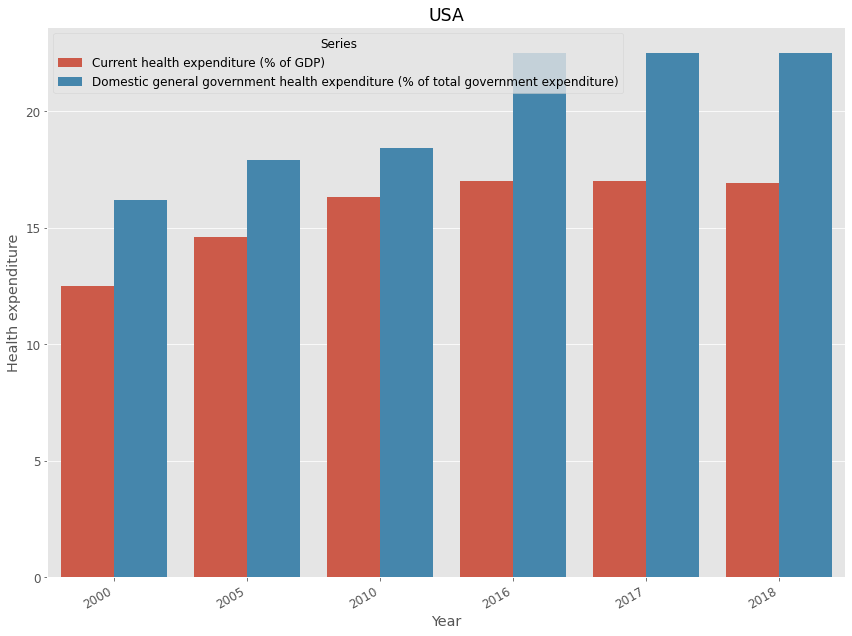

In [21]:
plot_bar(x='Year', y='Value', 
         hue='Series', 
         df=df1_gpd.get_group('United States of America'),
         xlabel='Year', ylabel='Health expenditure',
         main_title='USA', 
         leg_title='Series', loc=2, leg_labels=['Current health expenditure (% of GDP)', 
                                                'Domestic general government health expenditure (% of total government expenditure)'])

<function __main__.plot_bar(x, y, hue, df, main_title=None, xlabel=None, ylabel=None, leg_title=None, loc=None, leg_labels=None)>

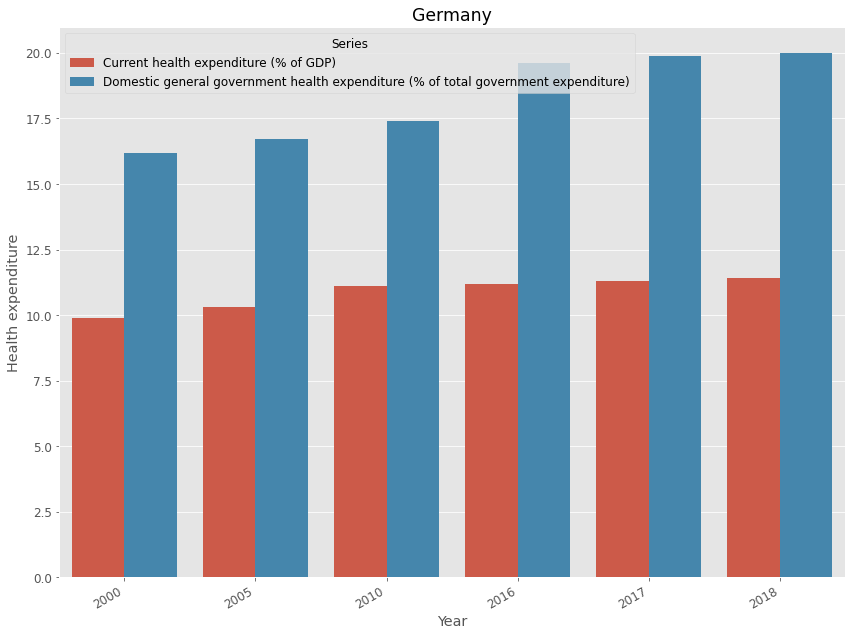

In [22]:
plot_bar(x='Year', y='Value', 
         hue='Series', 
         df=df1_gpd.get_group('Germany'),
         xlabel='Year', ylabel='Health expenditure',
         main_title='Germany', 
         leg_title='Series', loc=2, leg_labels=['Current health expenditure (% of GDP)', 
                                                'Domestic general government health expenditure (% of total government expenditure)'])

<function __main__.plot_bar(x, y, hue, df, main_title=None, xlabel=None, ylabel=None, leg_title=None, loc=None, leg_labels=None)>

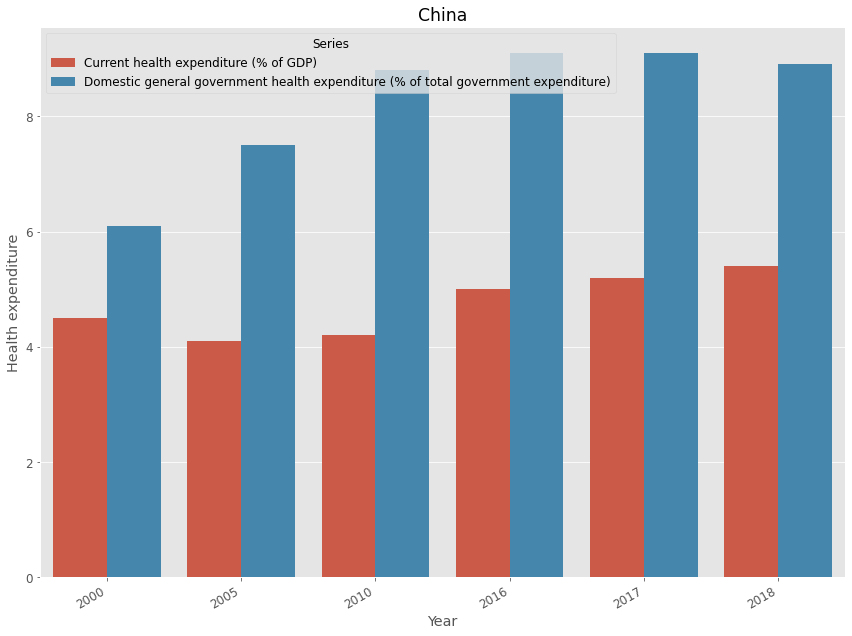

In [23]:
plot_bar(x='Year', y='Value', 
         hue='Series', 
         df=df1_gpd.get_group('China'),
         xlabel='Year', ylabel='Health expenditure',
         main_title='China', 
         leg_title='Series', loc=2, leg_labels=['Current health expenditure (% of GDP)', 
                                                'Domestic general government health expenditure (% of total government expenditure)'])

<function __main__.plot_bar(x, y, hue, df, main_title=None, xlabel=None, ylabel=None, leg_title=None, loc=None, leg_labels=None)>

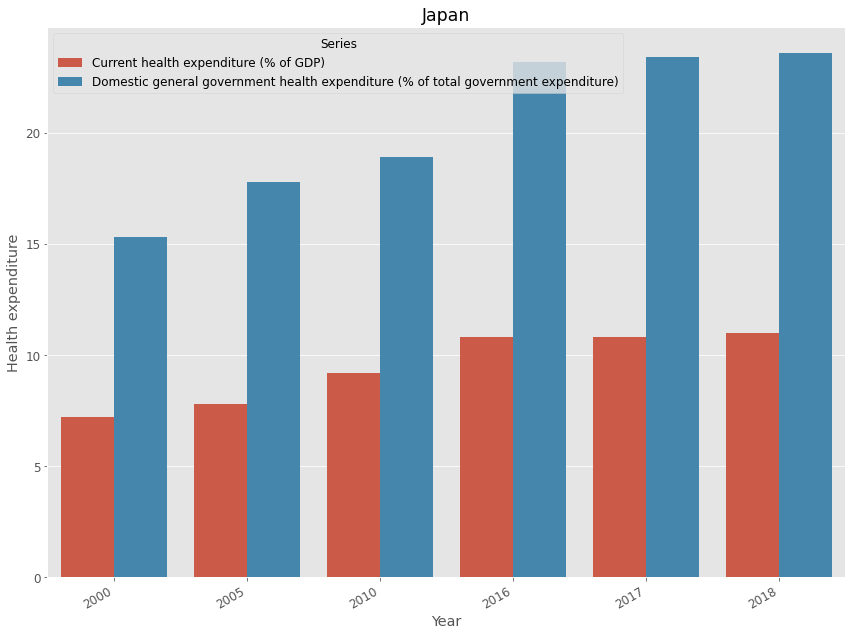

In [24]:
plot_bar(x='Year', y='Value', 
         hue='Series', 
         df=df1_gpd.get_group('Japan'),
         xlabel='Year', ylabel='Health expenditure',
         main_title='Japan', 
         leg_title='Series', loc=2, leg_labels=['Current health expenditure (% of GDP)', 
                                                'Domestic general government health expenditure (% of total government expenditure)'])